In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
train_data = pd.read_csv('train.csv') 

In [6]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

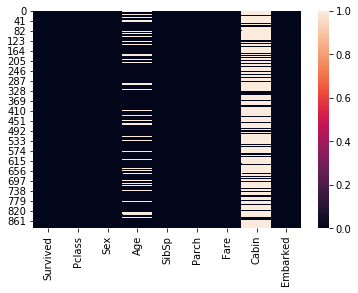

In [8]:
sns.heatmap(train_data.isnull())

In [9]:
#Too many NANs in Cabin, dropping it

train_data.drop('Cabin', axis=1, inplace=True)

In [10]:
Sex = pd.get_dummies(train_data['Sex'], drop_first=True)
Embarked = pd.get_dummies(train_data['Embarked'], drop_first=True)

In [11]:
train_data.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [12]:
train_data = pd.concat([train_data, Sex, Embarked], axis=1)

In [13]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


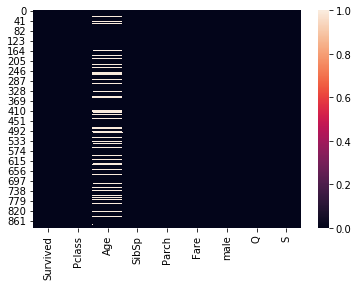

In [14]:
sns.heatmap(train_data.isnull())

In [15]:
from sklearn.preprocessing import Imputer
my_imputer = Imputer()
data_with_imputed_values = pd.DataFrame(my_imputer.fit_transform(train_data))

In [16]:
data_with_imputed_values.columns = train_data.columns

In [17]:
data_with_imputed_values.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0
4,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0


In [18]:
new_data = data_with_imputed_values.copy()
new_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0
4,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0


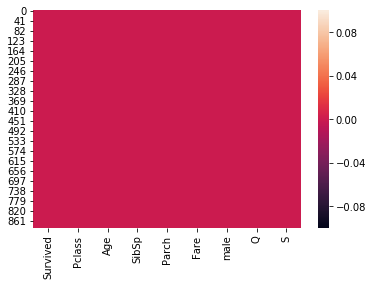

In [19]:
sns.heatmap(new_data.isnull())

In [20]:
X = new_data.drop('Survived', axis=1)
y = new_data['Survived']

In [21]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0
1,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0
2,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0
3,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0
4,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0


In [22]:
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [23]:
from sklearn.cross_validation import  train_test_split

/home/piyush/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [26]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
y_pred = model.predict(X_test)

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.84      0.84      0.84       160
        1.0       0.77      0.77      0.77       108

avg / total       0.81      0.81      0.81       268



In [30]:
test_data = pd.read_csv('test.csv')

In [31]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [32]:
test_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

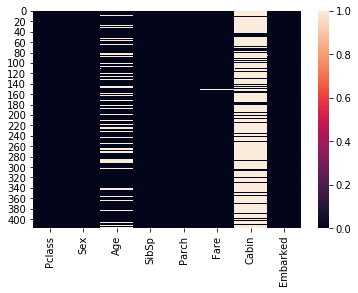

In [33]:
sns.heatmap(test_data.isnull())

In [34]:
test_data.drop('Cabin', axis=1, inplace=True)

In [35]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [36]:
Sex = pd.get_dummies(test_data['Sex'], drop_first=True)
Embarked = pd.get_dummies(test_data['Embarked'], drop_first=True)

In [37]:
test_data.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [38]:
test_data = pd.concat([test_data, Sex, Embarked], axis=1)

In [39]:
test_data.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


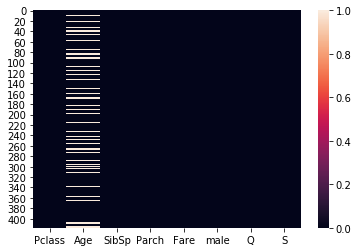

In [40]:
sns.heatmap(test_data.isnull())

In [41]:
test_data1 = pd.DataFrame(my_imputer.fit_transform(test_data))

In [42]:
test_data1.columns = test_data.columns
test_data1.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3.0,34.5,0.0,0.0,7.8292,1.0,1.0,0.0
1,3.0,47.0,1.0,0.0,7.0000,0.0,0.0,1.0
2,2.0,62.0,0.0,0.0,9.6875,1.0,1.0,0.0
3,3.0,27.0,0.0,0.0,8.6625,1.0,0.0,1.0
4,3.0,22.0,1.0,1.0,12.2875,0.0,0.0,1.0


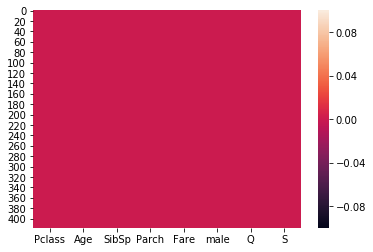

In [43]:
sns.heatmap(test_data1.isnull())

In [44]:
test_data_y_pred = model.predict(test_data1)

In [45]:
example_subm = pd.read_csv('gender_submission.csv')

In [46]:
example_subm.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [47]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [48]:
pd.DataFrame({'PassengerId':test_data.PassengerId, 'Survived':test_data_y_pred}).set_index('PassengerId').to_csv('Titanic_Submission_LogR.csv', float_format='%.f')